<a href="https://colab.research.google.com/github/juhumkwon/Data/blob/main/lof(%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

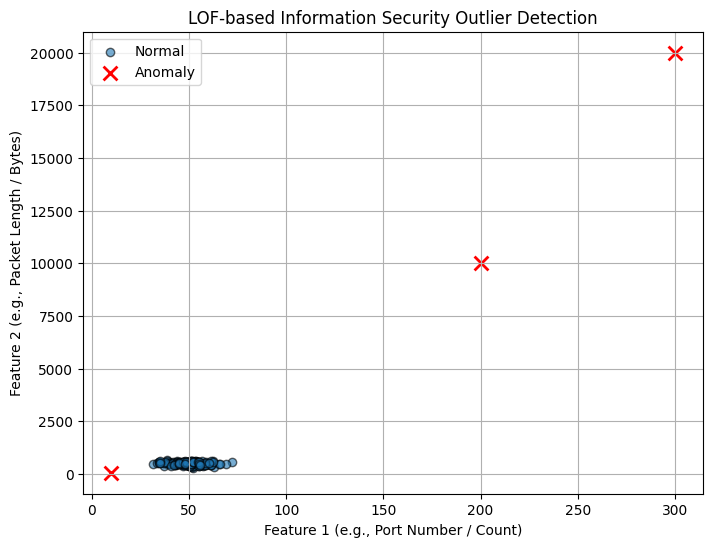

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 1. 정상 트래픽 데이터 생성 (이변량 정규분포)
normal_data = np.random.multivariate_normal(
    mean=[50, 500],             # 예: 포트 수, 평균 전송 길이
    cov=[[50, 0], [0, 5000]],   # 공분산 (포트, 트래픽)
    size=200                    # 정상 샘플 200개
)

# 2. 명시적 이상치 데이터 (정보보호에서 흔한 비정상 상황 예시)
outliers = np.array([
    [200, 10000],  # 매우 큰 트래픽
    [10, 50],      # 매우 짧은 연결
    [300, 20000],  # 둘 다 과도함
])

# 3. 전체 데이터 구성
data = np.concatenate([normal_data, outliers], axis=0)

# 4. LOF 모델 구성 및 학습
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
predicted_labels = lof.fit_predict(data)  # 결과: 1 (정상), -1 (이상치)

# 5. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data[predicted_labels == 1][:, 0], data[predicted_labels == 1][:, 1],
            label='Normal', alpha=0.6, edgecolor='k')
plt.scatter(data[predicted_labels == -1][:, 0], data[predicted_labels == -1][:, 1],
            label='Anomaly', color='red', marker='x', s=100, linewidths=2)

plt.title("LOF-based Information Security Outlier Detection")
plt.xlabel("Feature 1 (e.g., Port Number / Count)")
plt.ylabel("Feature 2 (e.g., Packet Length / Bytes)")
plt.legend()
plt.grid(True)
plt.show()
